# Import necessary libraries

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load  dataset

In [2]:
data = pd.read_csv('advertising.csv')
data

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]

# Assuming 'Sales' is the target variable and 'TV', 'Radio', 'Newspaper' are features

In [3]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training and testing set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression mode

In [17]:
model = LinearRegression()
model

LinearRegression()

# Train the model

In [6]:
model.fit(X_train, y_train)

LinearRegression()

# Make predictions on the test set

In [16]:
y_pred = model.predict(X_test)
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

# Evaluate the model

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 2.9077569102710896
R-squared Score: 0.9059011844150826


# Visualize the results

# 1. Scatter plot of Actual vs. Predicted Sale

Text(0.5, 1.0, 'Sales Prediction: Actual vs. Predicted')

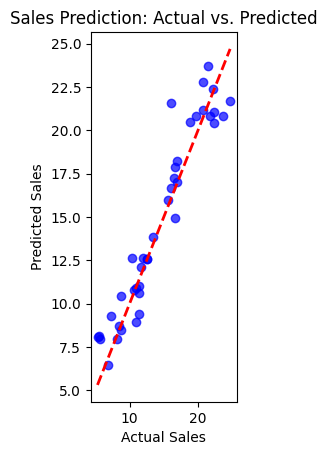

In [11]:
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, c='blue', alpha=0.7)  # Blue points
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Sales Prediction: Actual vs. Predicted")

# 2. Distribution of Sales

Text(0.5, 1.0, 'Distribution of Sales')

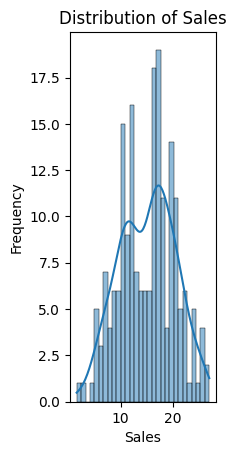

In [14]:
plt.subplot(1, 3, 2)
sns.histplot(data['Sales'], bins=30, kde=True)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Sales")

# 3. Correlation Heatmap

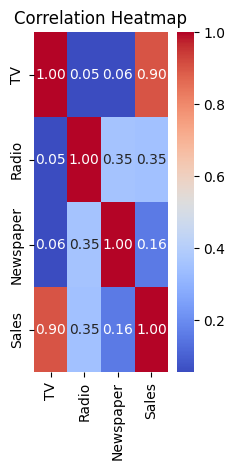

In [15]:
plt.subplot(1, 3, 3)
correlation_matrix = data[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()
